In [11]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit.library import QFT

In [2]:
api_token='IBM TOKEN'

IBMProvider.save_account(api_token, overwrite=True)
provider = IBMProvider()
print("Available backends:", provider.backends())

Available backends: [<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_brisbane')>]


In [12]:
def uRot(qc,control,target,theta,exponent):
    qc.cp(2*pi*theta*exponent,control,target)

In [16]:
qpe= QuantumCircuit(4,3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)

for qubit in range(3):
    uRot(qpe,qubit,3,0.125,pow(2,qubit))


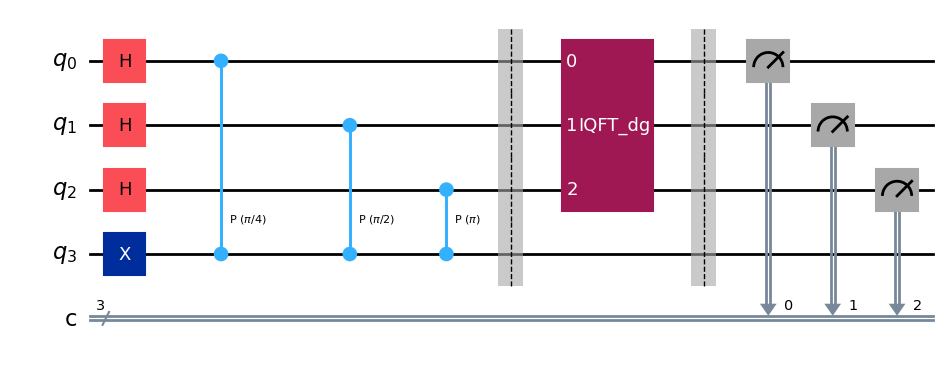

In [17]:
qpe.barrier()
qpe=qpe.compose(QFT(3,inverse=True),[0,1,2])
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)
qpe.draw(output="mpl")

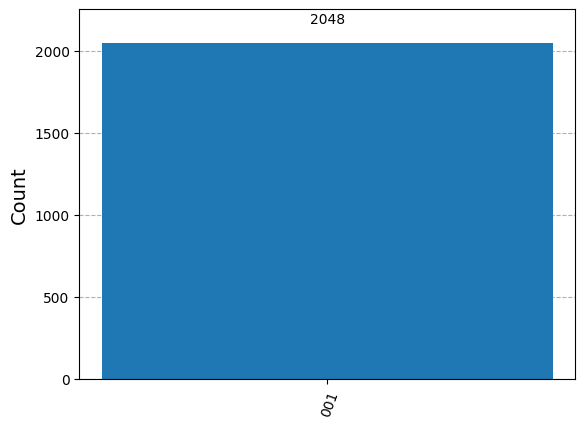

In [18]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)